In [1]:
from keras.applications import VGG16
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard 
import time 
 
vgg_conv = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

Using TensorFlow backend.


In [2]:
import keras
import numpy as np
from random import shuffle
train_dir = 'C:/Users/Muhammad Zubair Khan/Downloads/Compressed/ddb1_fundusimages/project_data/train'
validation_dir = 'C:/Users/Muhammad Zubair Khan/Downloads/Compressed/ddb1_fundusimages/project_data/validation'
 
nTrain = 174
nValidation = 74

datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
batch_size = 10
 
train_features = np.zeros(shape=(nTrain, 7, 7, 512))
train_labels = np.zeros(shape=(nTrain,4))

validation_features = np.zeros(shape=(nValidation, 7, 7, 512))
validation_labels = np.zeros(shape=(nValidation,4))


 
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=shuffle)

validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=shuffle)

Found 174 images belonging to 4 classes.
Found 74 images belonging to 4 classes.


In [3]:
import keras
nImages=174
i = 0
for inputs_batch, labels_batch in train_generator:
    features_batch = vgg_conv.predict(inputs_batch)
    train_features[i * batch_size : (i + 1) * batch_size] = features_batch
    train_labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= nImages:
        break
         
train_features = np.reshape(train_features, (nTrain, 7 * 7 * 512))

In [4]:
import keras
nValid=74
i = 0
for inputs_batch, labels_batch in validation_generator:
    features_batch = vgg_conv.predict(inputs_batch)
    validation_features[i * batch_size : (i + 1) * batch_size] = features_batch
    validation_labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= nValid:
        break
         
validation_features = np.reshape(validation_features, (nValidation, 7 * 7 * 512))

In [5]:
from keras import models
from keras import layers
from keras import optimizers
 
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=7 * 7 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])
 
history = model.fit(train_features,
                    train_labels,
                    epochs=50,
                    batch_size=batch_size,
                    validation_data=(validation_features,validation_labels))

Train on 174 samples, validate on 74 samples
Epoch 1/50
174/174 [==============================] - 17s 96ms/step - loss: 7.8005 - acc: 0.4080 - val_loss: 9.6995 - val_acc: 0.3378
Epoch 2/50
174/174 [==============================] - 3s 19ms/step - loss: 7.6709 - acc: 0.4483 - val_loss: 10.3121 - val_acc: 0.3378
Epoch 3/50
174/174 [==============================] - 3s 19ms/step - loss: 7.9951 - acc: 0.4770 - val_loss: 10.2991 - val_acc: 0.3514
Epoch 4/50
174/174 [==============================] - 3s 19ms/step - loss: 7.1061 - acc: 0.5000 - val_loss: 10.3280 - val_acc: 0.3378
Epoch 5/50
174/174 [==============================] - 3s 19ms/step - loss: 6.9935 - acc: 0.5287 - val_loss: 9.8712 - val_acc: 0.3649
Epoch 6/50
174/174 [==============================] - 3s 19ms/step - loss: 7.2559 - acc: 0.4828 - val_loss: 9.9505 - val_acc: 0.3514
Epoch 7/50
174/174 [==============================] - 3s 19ms/step - loss: 6.9753 - acc: 0.5345 - val_loss: 10.3493 - val_acc: 0.3378
Epoch 8/50
174/174 

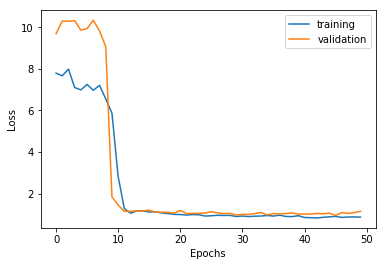

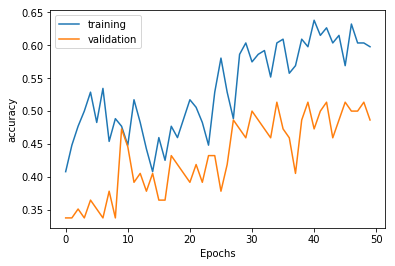

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_history(value):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel("Loss")
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['training', 'validation'])
    
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel("accuracy")
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.legend(['training', 'validation'])
    plt.show()
    
plot_history(history)


In [10]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = model.predict(validation_features)
y_pred = model.predict_classes(validation_features)
target_names = ['class 0(Normal)', 'class 1(DR1)', 'class 2(DR2)', 'class 3(DR3)']
print(classification_report(np.argmax(validation_labels, axis=1), y_pred, target_names=target_names))
print(confusion_matrix(np.argmax(validation_labels, axis=1), y_pred))

                 precision    recall  f1-score   support

class 0(Normal)       0.43      0.67      0.52         9
   class 1(DR1)       0.43      1.00      0.60        22
   class 2(DR2)       0.00      0.00      0.00        22
   class 3(DR3)       0.89      0.38      0.53        21

      micro avg       0.49      0.49      0.49        74
      macro avg       0.44      0.51      0.41        74
   weighted avg       0.43      0.49      0.39        74

[[ 6  2  0  1]
 [ 0 22  0  0]
 [ 0 22  0  0]
 [ 8  5  0  8]]
